In [2]:
# coding:utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, metrics
from datetime import datetime as dt
from sklearn.preprocessing import LabelEncoder

# pandas
import pandas as pd
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_colwidth", 1000)

# LightGBM
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 交差検証
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# AUC
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

#catboost
from catboost import CatBoostClassifier, Pool

/Users/toshiki/py37env/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [10]:
train_df = pd.read_csv('../input/train.csv')
out_of_service_df = pd.read_csv('../input/out_of_service.csv')
stop_station_location_df = pd.read_csv('../input/stop_station_location.csv')
tunnel_location_df = pd.read_csv('../input/tunnel_location.csv')
diagram_df = pd.read_csv('../input/diagram.csv')
kanazawa_nosnow_df = pd.read_csv('../input/kanazawa_nosnow.csv')
weather_df = pd.read_csv('../input/weather.csv')
test_df = pd.read_csv('../input/test.csv')
sample_sabmit_df = pd.read_csv('../input/sample_submit.csv')

In [11]:
train_df

年月日   列車番号 停車駅名  フェンダー部分(東京方向)  台車部分  フェンダー部分(金沢方向)        合計
0      2016-01-19  3500E   富山            0.0   0.0       0.000000  0.000000
1      2016-01-19   562E   富山            0.0   0.0       0.000000  0.000000
2      2016-01-19   560E  糸魚川            0.0   0.0       0.000000  0.000000
3      2016-01-19   560E   富山            0.0   0.0       0.002986  0.002986
4      2016-01-19   558E  糸魚川            0.0   0.0       0.000000  0.000000
...           ...    ...  ...            ...   ...            ...       ...
15310  2016-12-31   554E  糸魚川            0.0   0.0       0.000000  0.000000
15311  2016-12-31   574E  糸魚川            0.0   0.0       0.000000  0.000000
15312  2016-12-31   576E   富山            0.0   0.0       0.000000  0.000000
15313  2016-12-31   558E   富山            0.0   0.0       0.000000  0.000000
15314  2016-12-31   562E  糸魚川            0.0   0.0       0.000000  0.000000

[15315 rows x 7 columns]

In [12]:
out_of_service_df

年月日      停車時刻 停車駅名  フェンダー部分(東京方向)      台車部分  フェンダー部分(金沢方向)        合計
0   2016-01-19  06:41:00  糸魚川       0.000000  0.000000       0.000000  0.000000
1   2016-01-19  19:33:00  糸魚川       0.000000  0.000000       0.004300  0.004300
2   2016-01-19  20:21:00  糸魚川       0.000000  0.012065       0.003721  0.015786
3   2016-01-19  21:42:00  糸魚川       0.000000  0.000000       0.002074  0.002074
4   2016-01-20  05:00:00   富山       0.000000  0.000000       0.001653  0.001653
5   2016-01-20  20:37:00   富山       0.000000  0.000000       0.000000  0.000000
6   2016-01-21  10:06:00   富山       0.000000  0.000000       0.000992  0.000992
7   2016-01-23  22:41:00   富山       0.000000  0.000000       0.000394  0.000394
8   2016-01-23  12:31:00   富山       0.000000  0.000000       0.000000  0.000000
9   2016-01-24  22:42:00   富山       0.007702  0.011994       0.003501  0.023197
10  2016-01-24  07:42:00  糸魚川       0.000000  0.005895       0.003831  0.009726
11  2016-01-24  17:20:00  糸魚川       0.000000  0.000000       0.000000  0.000000
12  2016-01-24  16:34:00  糸魚川       0.000000  0.000000       0.000000  0.000000
13  2016-01-24  15:32:00  糸魚川       0.000000  0.000000       0.000000  0.000000
14  2016-01-24  09:25:00  糸魚川       0.000000  0.001995       0.000945  0.002940
15  2016-01-24  08:29:00  糸魚川       0.000000  0.004895       0.005160  0.010055
16  2016-01-24  08:02:00  糸魚川       0.000000  0.008243       0.003103  0.011346
17  2016-01-24  06:42:00  糸魚川       0.000000  0.004402       0.002136  0.006538
18  2016-01-25  10:54:00  糸魚川       0.000000  0.007298       0.002407  0.009705
19  2016-01-25  09:25:00  糸魚川       0.000048  0.002732       0.003908  0.006688
20  2016-01-25  08:30:00  糸魚川       0.000221  0.004932       0.005369  0.010521
21  2016-01-25  08:00:00  糸魚川       0.000136  0.005393       0.002608  0.008136
22  2016-01-25  07:42:00  糸魚川       0.002262  0.017006       0.000122  0.019390
23  2016-01-25  06:42:00  糸魚川       0.002535  0.009358       0.007220  0.019114

In [13]:
stop_station_location_df

停車場名      キロ程         緯度          経度
0       金沢    0.000  36.577817  136.647963
1      新高岡   39.620  36.726969  137.011904
2       富山   58.510  36.701322  137.213608
3  黒部宇奈月温泉   92.290  36.874050  137.481133
4      糸魚川  131.543  37.043119  137.861307
5     上越妙高  168.540  37.081591  138.248252
6       飯山  198.100  36.845166  138.358924
7       長野  228.030  36.643146  138.188645

In [14]:
tunnel_location_df

トンネル名    始点キロ程    終点キロ程       始点緯度        始点経度       終点緯度        終点経度
0   T001    7.800    8.049  36.627109  136.708924  36.628530  136.711117
1   T002    8.190    8.470  36.629304  136.712417  36.630828  136.714863
2   T003    8.615    9.335  36.631591  136.716163  36.635594  136.722536
3   T004    9.565   12.445  36.636946  136.724478  36.655702  136.746651
4   T005   13.820   14.198  36.666148  136.754941  36.668985  136.757273
5   T006   14.755   15.205  36.675574  136.764994  36.675576  136.765003
6   T007   15.935   16.195  36.679258  136.771756  36.680334  136.774334
7   T008   16.683   23.315  36.681961  136.779407  36.673033  136.851453
8   T009   55.730   56.245  36.714750  137.188532  36.712212  137.192307
9   T010   79.760   80.359  36.778801  137.408641  36.781971  137.414077
10  T011   81.436   84.533  36.789055  137.422258  36.814219  137.437205
11  T012   85.945   87.000  36.825819  137.443640  36.834517  137.448489
12  T013   87.865   88.710  36.841616  137.452447  36.848368  137.456804
13  T014   88.890   90.150  36.849724  137.457933  36.859007  137.466069
14  T015   90.340   90.424  36.860396  137.467294  36.861019  137.467841
15  T016   90.665   91.584  36.862792  137.469391  36.869229  137.475916
16  T017  102.959  110.518  36.935045  137.571666  36.970988  137.643629
17  T018  110.826  118.149  36.972322  137.646514  36.996294  137.723248
18  T019  118.405  120.148  36.997106  137.725943  37.003164  137.744056
19  T020  120.248  124.548  37.003533  137.745028  37.017275  137.789968
20  T021  125.221  125.296  37.018711  137.797323  37.018890  137.798142
21  T022  125.587  126.150  37.019658  137.801258  37.021748  137.807262
22  T023  135.523  136.180  37.052442  137.904345  37.053833  137.911509
23  T024  136.900  138.340  37.056399  137.918907  37.064183  137.931843
24  T025  138.430  142.381  37.064712  137.932608  37.081161  137.971074
25  T026  142.521  145.135  37.081436  137.972609  37.085414  138.001558
26  T027  147.215  154.250  37.087742  138.024785  37.098831  138.102616
27  T028  154.360  156.166  37.098998  138.103841  37.101673  138.123866
28  T029  156.380  163.155  37.102085  138.126213  37.110308  138.201097
29  T030  163.235  165.987  37.110136  138.201948  37.097768  138.228393

In [15]:
diagram_df

停車場名 3500E  552E 3502E 9536E  554E 3504E   556E 3506E   558E  3508E   560E  8526E   562E   564E  8528E   566E  9582E   568E  3510E   570E  3512E   572E  8530E  3514E   574E  8532E   576E  3516E   578E  3518E   590E
0       金沢  6:00  6:13  7:00  7:08  7:23  7:48   8:23  8:48   9:21   9:46  10:56  11:46  11:56  12:56  13:46  13:56  14:23  14:50  15:55  16:09  16:47  16:49  17:07  17:55  18:09  18:47  19:02  19:18  20:17  21:00  21:35
1      新高岡     ↓  6:27     ↓  7:22  7:37     ↓   8:37     ↓   9:35      ↓  11:10      ↓  12:10  13:10      ↓  14:10  14:37  15:04      ↓  16:23      ↓  17:04      ↓      ↓  18:23      ↓  19:16      ↓  20:31      ↓  21:49
2       富山  6:19  6:37  7:19  7:32  7:47  8:07   8:47  9:07   9:45  10:05  11:19  12:06  12:19  13:19  14:06  14:19  14:47  15:13  16:15  16:33  17:06  17:13  17:26  18:15  18:32  19:07  19:25  19:37  20:41  21:20  21:58
3  黒部宇奈月温泉     ↓  6:50     ↓     ↓  7:59     ↓   9:00     ↓   9:57      ↓  11:32      ↓  12:32  13:32      ↓  14:32      ↓  15:26      ↓  16:46      ↓  17:26      ↓      ↓  18:45      ↓  19:38      ↓  20:54      ↓  22:11
4      糸魚川     ↓  7:04     ↓     ↓  8:13     ↓   9:13     ↓  10:11      ↓  11:46      ↓  12:46  13:46      ↓  14:46      ↓  15:40      ↓  17:00      ↓  17:40      ↓      ↓  18:59      ↓  19:52      ↓  21:08      ↓  22:25
5     上越妙高     ↓  7:17     ↓     ↓  8:27     ↓   9:27     ↓  10:25      ↓  11:59      ↓  12:59  13:59      ↓  14:59  15:19  15:53      ↓  17:13      ↓  17:57      ↓      ↓  19:13      ↓  20:09      ↓  21:21      ↓  22:38
6       飯山     ↓  7:29     ↓     ↓  8:39     ↓   9:39     ↓  10:37      ↓  12:11      ↓      ↓  14:11      ↓      ↓      ↓  16:05      ↓      ↓      ↓  18:09      ↓      ↓  19:25      ↓  20:21      ↓  21:33      ↓  22:51
7       長野  7:07  7:42  8:07  8:20  9:00  8:55  10:00  9:55  11:00  10:53  12:24  12:53  13:20  14:24  14:53  15:20  15:38  16:18  17:03  17:34  17:55  18:22  18:14  19:03  19:38  19:53  20:34  20:26  21:46  22:08  23:02

In [16]:
kanazawa_nosnow_df

2290E
0    552E
1   3502E
2   9536E
3    554E
4   2292E
5   3506E
6   3508E
7    560E
8    564E
9    566E
10   568E
11  8528E
12  8530E
13  3510E
14   572E
15  8532E
16  3512E
17  3514E
18  3516E
19   728E
20   734E

In [17]:
weather_df

年月日時  地点  気温(℃)  降水量(mm)  降雪(cm)  積雪(cm)  日照時間(時間)  風速(m/s)   風向  日射量(MJ/㎡)  現地気圧(hPa)  海面気圧(hPa)  相対湿度(％)  蒸気圧(hPa)  雲量(10分比)  露点温度(℃)    天気  視程(km)
0       2015/12/1 1:00  富山    9.4      2.0     0.0     0.0       0.0      1.4    西        0.0     1020.7     1022.8     86.0      10.1       NaN      7.2   NaN     NaN
1       2015/12/1 2:00  富山    9.0      0.5     0.0     0.0       0.0      1.7    南        0.0     1021.6     1023.7     88.0      10.1       NaN      7.1   NaN     NaN
2       2015/12/1 3:00  富山    9.1      0.0     0.0     0.0       0.0      0.6  西北西        0.0     1022.3     1024.4     89.0      10.3      10.0      7.4  10.0    10.0
3       2015/12/1 4:00  富山    8.8      0.5     0.0     0.0       0.0      1.7  北北西        0.0     1022.4     1024.5     88.0      10.0       NaN      6.9   NaN     NaN
4       2015/12/1 5:00  富山    8.5      0.0     0.0     0.0       0.0      1.7   南東        0.0     1022.5     1024.6     88.0       9.8       NaN      6.6   NaN     NaN
...                ...  ..    ...      ...     ...     ...       ...      ...  ...        ...        ...        ...      ...       ...       ...      ...   ...     ...
17491  2017/3/31 20:00  金沢    7.4      0.0     0.0     0.0       0.0      4.0  東北東        NaN     1013.7     1017.9     63.0       6.5       NaN      0.8   NaN     NaN
17492  2017/3/31 21:00  金沢    7.5      0.0     0.0     0.0       0.0      5.0  東北東        NaN     1012.8     1016.9     63.0       6.5      10.0      0.9   4.0    15.0
17493  2017/3/31 22:00  金沢    7.4      0.0     0.0     0.0       0.0      5.4  東北東        NaN     1012.4     1016.5     63.0       6.5       NaN      0.8   NaN     NaN
17494  2017/3/31 23:00  金沢    7.4      0.0     0.0     0.0       0.0      5.1  東北東        NaN     1012.3     1016.4     62.0       6.4       NaN      0.6   NaN     NaN
17495    2017/4/1 0:00  金沢    7.2      0.0     0.0     0.0       0.0      5.1  東北東        NaN     1011.8     1015.9     62.0       6.3       NaN      0.4   NaN     NaN

[17496 rows x 18 columns]

In [18]:
test_df

Unnamed: 0         年月日   列車番号
0              0  2017-01-01  3500E
1              1  2017-01-01   552E
2              2  2017-01-01  3502E
3              3  2017-01-01  9536E
4              4  2017-01-01   554E
...          ...         ...    ...
2425        2425  2017-03-31   576E
2426        2426  2017-03-31  3516E
2427        2427  2017-03-31   578E
2428        2428  2017-03-31  3518E
2429        2429  2017-03-31   590E

[2430 rows x 3 columns]

In [19]:
sample_sabmit_df

0  0.0
0        1  0.0
1        2  0.0
2        3  0.0
3        4  0.0
4        5  0.0
...    ...  ...
2424  2425  0.0
2425  2426  0.0
2426  2427  0.0
2427  2428  0.0
2428  2429  0.0

[2429 rows x 2 columns]

In [9]:
train_df.fillna(0, inplace=True)

In [5]:
### FREQUENCY ENCODING

encoding = purchase_df.groupby('product_id').size()
encoding = encoding/len(purchase_df)
purchase_df['enc_product_id'] = purchase_df.product_id.map(encoding)

encoding = test_df.groupby('product_id').size()
encoding = encoding/len(test_df)
test_df['enc_product_id'] = test_df.product_id.map(encoding)

In [6]:
encoding = user_df.groupby('attribute_1').size()
encoding = encoding/len(user_df)
user_df['enc_attribute_1'] = user_df.attribute_1.map(encoding)

encoding = user_df.groupby('attribute_2').size()
encoding = encoding/len(user_df)
user_df['enc_attribute_2'] = user_df.attribute_2.map(encoding)

encoding = user_df.groupby('attribute_3').size()
encoding = encoding/len(user_df)
user_df['enc_attribute_3'] = user_df.attribute_3.map(encoding)

In [7]:
train_df = pd.merge(purchase_df, user_df, how='left', on='user_id')

In [8]:
train_df['date_diff'] = (pd.to_datetime(train_df['date_x']) - pd.to_datetime(train_df['date_y'])).dt.days

In [9]:
train_df['date_x_dt'] = pd.to_datetime(train_df['date_x'])
train_df['date_y_dt'] = pd.to_datetime(train_df['date_y'])

train_df['year_x'] = train_df['date_x_dt'].dt.to_period('Y').astype(int).astype(float)
train_df['month_x'] = train_df['date_x_dt'].dt.to_period('M').astype(int).astype(float)
train_df['day_x'] = train_df['date_x_dt'].dt.to_period('D').astype(int).astype(float)
train_df['year_y'] = train_df['date_y_dt'].dt.to_period('Y').astype(int).astype(float)
train_df['month_y'] = train_df['date_y_dt'].dt.to_period('M').astype(int).astype(float)
train_df['day_y'] = train_df['date_y_dt'].dt.to_period('D').astype(int).astype(float)

In [10]:
train_df.drop(columns = 'date_x_dt', inplace=True)
train_df.drop(columns = 'date_y_dt', inplace=True)

In [11]:
test_df.fillna(0, inplace=True)

In [12]:
test_df = pd.merge(test_df, user_df, how='left', on='user_id')

In [13]:
test_df['date_diff'] = (pd.to_datetime(test_df['date_x']) - pd.to_datetime(test_df['date_y'])).dt.days

In [14]:
test_df['date_x_dt'] = pd.to_datetime(test_df['date_x'])
test_df['date_y_dt'] = pd.to_datetime(test_df['date_y'])

test_df['year_x'] = test_df['date_x_dt'].dt.to_period('Y').astype(int).astype(float)
test_df['month_x'] = test_df['date_x_dt'].dt.to_period('M').astype(int).astype(float)
test_df['day_x'] = test_df['date_x_dt'].dt.to_period('D').astype(int).astype(float)
test_df['year_y'] = test_df['date_y_dt'].dt.to_period('Y').astype(int).astype(float)
test_df['month_y'] = test_df['date_y_dt'].dt.to_period('M').astype(int).astype(float)
test_df['day_y'] = test_df['date_y_dt'].dt.to_period('D').astype(int).astype(float)

In [15]:
test_df.drop(columns = 'date_x_dt', inplace=True)
test_df.drop(columns = 'date_y_dt', inplace=True)

In [16]:
X = train_df.drop(columns='purchase')
y = train_df.purchase

In [17]:
X

user_id     purchase_id      date_x product_id parts_1 parts_2 parts_3 parts_4 parts_5 parts_6 parts_7 parts_8 parts_9  enc_product_id      date_y attribute_1 attribute_2 attribute_3  attribute_4  attribute_5  attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  attribute_11  attribute_12  attribute_13  attribute_14  attribute_15  attribute_16  attribute_17  attribute_18  attribute_19  attribute_20  attribute_21  attribute_22  attribute_23  attribute_24  attribute_25  attribute_26  attribute_27  attribute_28  attribute_29  attribute_30  enc_attribute_1  enc_attribute_2  enc_attribute_3  date_diff  year_x  month_x    day_x  year_y  month_y    day_y
0           uid_100  pid_0000000000  2017-09-27  product 2       0       0       0       0       0       0       0       0       0        0.450107  2016-06-29        id 5        id 5        id 5         True        False        False         True         True        False          True         False         False         False         False          True         False         False         False         False          True          True         False          True          True         False         False          True          True          True         False         0.073892         0.076166         0.152797        455    47.0    572.0  17436.0    46.0    557.0  16981.0
1           uid_100  pid_0000000001  2017-09-27  product 2       0       0       0       0       0       0       0       0       0        0.450107  2016-06-29        id 5        id 5        id 5         True        False        False         True         True        False          True         False         False         False         False          True         False         False         False         False          True          True         False          True          True         False         False          True          True          True         False         0.073892         0.076166         0.152797        455    47.0    572.0  17436.0    46.0    557.0  16981.0
2        uid_100002  pid_0000000002  2017-11-23  product 2       0       0       0       0       0       0       0       0       0        0.450107  2016-01-06       id 28        id 9        id 5        False        False         True         True        False        False         False          True         False         False         False         False         False          True         False          True          True         False         False          True          True          True          True          True          True          True         False         0.003569         0.012220         0.152797        687    47.0    574.0  17493.0    46.0    552.0  16806.0
3        uid_100002  pid_0000000003  2017-11-23  product 2       0       0       0       0       0       0       0       0       0        0.450107  2016-01-06       id 28        id 9        id 5        False        False         True         True        False        False         False          True         False         False         False         False         False          True         False          True          True         False         False          True          True          True          True          True          True          True         False         0.003569         0.012220         0.152797        687    47.0    574.0  17493.0    46.0    552.0  16806.0
4        uid_100003  pid_0000000004  2018-02-07  product 2       0       0       0       0       0       0       0       0       0        0.450107  2017-06-10        id 4        id 8        id 5         True         True         True         True         True         True         False          True         False          True         False          True          True          True          True          True          True          True         False         False          True          True          True          True         False          True          True         0.148540         0.039706       

In [18]:
# 学習データ
# 必要ない列を削除
X = X.drop('user_id', axis=1)
# X = X.drop('purchase_id', axis=1)
X = X.drop('date_x', axis=1)
X = X.drop('date_y', axis=1)
X = X.set_index('purchase_id')

# 全列one-hot
X = pd.get_dummies(X)

#------------------------------------
# テストデータ
# 必要ない列を削除
test_df = test_df.drop('user_id', axis=1)
# test_df = test_df.drop('purchase_id', axis=1)
test_df = test_df.drop('date_x', axis=1)
test_df = test_df.drop('date_y', axis=1)
test_df = test_df.set_index('purchase_id')


# 全列one-hot
test_df = pd.get_dummies(test_df)

In [19]:
X.head(500)

enc_product_id  attribute_4  attribute_5  attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  attribute_11  attribute_12  attribute_13  attribute_14  attribute_15  attribute_16  attribute_17  attribute_18  attribute_19  attribute_20  attribute_21  attribute_22  attribute_23  attribute_24  attribute_25  attribute_26  attribute_27  attribute_28  attribute_29  attribute_30  enc_attribute_1  enc_attribute_2  enc_attribute_3  date_diff  year_x  month_x    day_x  year_y  month_y    day_y  product_id_product 1  product_id_product 2  product_id_product 3  product_id_product 4  product_id_product 5  product_id_product 6  product_id_product 7  parts_1_0  parts_1_id 1  parts_1_id 10  parts_1_id 11  parts_1_id 12  parts_1_id 13  parts_1_id 14  parts_1_id 15  parts_1_id 16  parts_1_id 17  parts_1_id 18  parts_1_id 19  parts_1_id 2  parts_1_id 20  parts_1_id 21  parts_1_id 22  parts_1_id 23  parts_1_id 24  parts_1_id 25  parts_1_id 26  parts_1_id 27  parts_1_id 28  \
purchase_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
pid_0000000000        0.450107         True        False        False         True         True        False          True         False         False         False         False          True         False         False         False         False          True          True         False          True          True         False         False          True          True          True         False         0.073892         0.076166         0.152797        455    47.0    572.0  17436.0    46.0    557.0  16981.0                     0                     1                     0                     0                     0                     0                     0          1             0              0              0              0              0              0              0              0              0              0              0             0              0              0              0              0              0              0              0              0              0   
pid_0000000001        0.450107         True        False        False         True         True        False          True         False         False         False         False          True         False         False         False         False          True          True         False          True          True         False         False          True          True          True         False         0.073892         0.076166         0.152797        455    47.0    572.0  17436.0    46.0    557.0  16981.0                     0                     1                     0                     0                     0                     0                     0          1             0              0              0              0              0              0              0              0              0              0              0             0              0              0              0              0              0              0              0              0              0   
pid_0000000002        0.

In [20]:
# カテゴリカル変数として扱うカラム指定
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
# データセットを生成する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [23]:
%%time
# パラメータを定義
lgbm_params = {'objective': 'binary',
                           'metric': 'auc',}       
# 学習
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)

[1]	valid_0's auc: 0.723123
[2]	valid_0's auc: 0.725921
[3]	valid_0's auc: 0.731599
[4]	valid_0's auc: 0.732474
[5]	valid_0's auc: 0.73475
[6]	valid_0's auc: 0.736128
[7]	valid_0's auc: 0.738317
[8]	valid_0's auc: 0.739751
[9]	valid_0's auc: 0.741268
[10]	valid_0's auc: 0.742203
[11]	valid_0's auc: 0.743541
[12]	valid_0's auc: 0.744431
[13]	valid_0's auc: 0.74506
[14]	valid_0's auc: 0.745959
[15]	valid_0's auc: 0.74706
[16]	valid_0's auc: 0.748004
[17]	valid_0's auc: 0.749532
[18]	valid_0's auc: 0.750343
[19]	valid_0's auc: 0.751347
[20]	valid_0's auc: 0.75275
[21]	valid_0's auc: 0.753594
[22]	valid_0's auc: 0.754537
[23]	valid_0's auc: 0.755468
[24]	valid_0's auc: 0.756379
[25]	valid_0's auc: 0.757041
[26]	valid_0's auc: 0.757865
[27]	valid_0's auc: 0.758624
[28]	valid_0's auc: 0.759566
[29]	valid_0's auc: 0.760353
[30]	valid_0's auc: 0.76118
[31]	valid_0's auc: 0.761703
[32]	valid_0's auc: 0.762419
[33]	valid_0's auc: 0.763572
[34]	valid_0's auc: 0.764336
[35]	valid_0's auc: 0.764919

In [24]:
# 保存
model.save_model('model.txt')

In [25]:
# 検証データを予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [26]:
# 保存したモデルを使う場合
#bst = lgb.Booster(model_file='model.txt')
#ypred = bst.predict(X_test, num_iteration=bst.best_iteration)

In [27]:
# AUC (Area Under the Curve) を計算する
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.7886853103882936


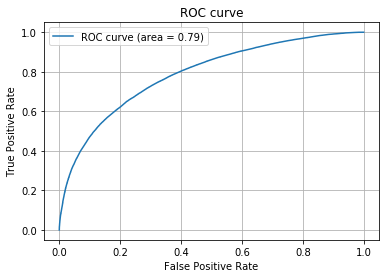

In [28]:
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

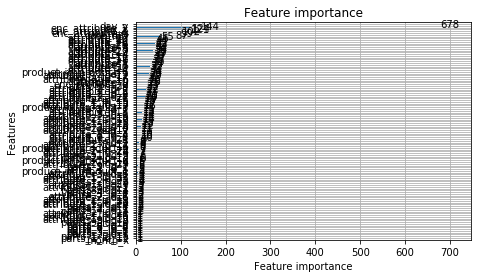

In [29]:
# 特徴量の重要度出力
model.feature_importance()

# 特徴量の重要度をプロット
lgb.plot_importance(model)

In [30]:
X_test

enc_product_id  attribute_4  attribute_5  attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  attribute_11  attribute_12  attribute_13  attribute_14  attribute_15  attribute_16  attribute_17  attribute_18  attribute_19  attribute_20  attribute_21  attribute_22  attribute_23  attribute_24  attribute_25  attribute_26  attribute_27  attribute_28  attribute_29  attribute_30  enc_attribute_1  enc_attribute_2  enc_attribute_3  date_diff  year_x  month_x    day_x  year_y  month_y    day_y  product_id_product 1  product_id_product 2  product_id_product 3  product_id_product 4  product_id_product 5  product_id_product 6  product_id_product 7  parts_1_0  parts_1_id 1  parts_1_id 10  parts_1_id 11  parts_1_id 12  parts_1_id 13  parts_1_id 14  parts_1_id 15  parts_1_id 16  parts_1_id 17  parts_1_id 18  parts_1_id 19  parts_1_id 2  parts_1_id 20  parts_1_id 21  parts_1_id 22  parts_1_id 23  parts_1_id 24  parts_1_id 25  parts_1_id 26  parts_1_id 27  parts_1_id 28  \
purchase_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
pid_0001616858        0.075743        False        False        False         True         True         True         False         False         False          True         False         False         False         False         False         False         False         False          True         False         False          True         False          True         False         False         False         0.025894         0.025894         0.025894        672    48.0    578.0  17598.0    46.0    556.0  16926.0                     1                     0                     0                     0                     0                     0                     0          0             0              0              0              0              0              0              0              0              0              0              0             0              0              0              0              0              0              0              0              0              0   
pid_0001649634        0.450107        False        False        False         True        False        False         False         False         False          True         False         False         False         False         False         False         False         False         False         False         False          True         False          True         False          True          True         0.070820         0.019999         0.116882          2    48.0    577.0  17564.0    48.0    576.0  17562.0                     0                     1                     0                     0                     0                     0                     0          1             0              0              0              0              0              0              0              0              0              0              0             0              0              0              0              0              0              0              0              0              0   
pid_0001026692        0.

In [31]:
test_df

enc_product_id  attribute_4  attribute_5  attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  attribute_11  attribute_12  attribute_13  attribute_14  attribute_15  attribute_16  attribute_17  attribute_18  attribute_19  attribute_20  attribute_21  attribute_22  attribute_23  attribute_24  attribute_25  attribute_26  attribute_27  attribute_28  attribute_29  attribute_30  enc_attribute_1  enc_attribute_2  enc_attribute_3  date_diff  year_x  month_x    day_x  year_y  month_y    day_y  product_id_product 1  product_id_product 2  product_id_product 3  product_id_product 4  product_id_product 5  product_id_product 6  product_id_product 7  parts_1_0  parts_1_id 1  parts_1_id 10  parts_1_id 11  parts_1_id 12  parts_1_id 13  parts_1_id 14  parts_1_id 15  parts_1_id 16  parts_1_id 17  parts_1_id 19  parts_1_id 2  parts_1_id 20  parts_1_id 23  parts_1_id 24  parts_1_id 25  parts_1_id 26  parts_1_id 27  parts_1_id 28  parts_1_id 29  parts_1_id 3  parts_1_id 30  \
purchase_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
pid_0001803575        0.170023         True        False        False         True         True        False          True         False         False         False         False          True         False         False         False         False          True          True         False          True          True         False         False          True          True          True         False         0.073892         0.076166         0.152797        788    48.0    583.0  17769.0    46.0    557.0  16981.0                     0                     0                     0                     1                     0                     0                     0          1             0              0              0              0              0              0              0              0              0              0             0              0              0              0              0              0              0              0              0             0              0   
pid_0001803576        0.431355         True        False        False         True         True        False          True         False         False         False         False          True         False         False         False         False          True          True         False          True          True         False         False          True          True          True         False         0.073892         0.076166         0.152797        766    48.0    583.0  17747.0    46.0    557.0  16981.0                     0                     1                     0                     0                     0                     0                     0          1             0              0              0              0              0              0              0              0              0              0             0              0              0              0              0              0              0              0              0             0              0   
pid_0001803577        0.4313

In [32]:
# テストデータを予測
test_predict = model.predict(test_df, num_iteration=model.best_iteration)

In [33]:
df_predict = pd.DataFrame(test_predict)
df_predict

0
0       0.810239
1       0.810271
2       0.810271
3       0.810239
4       0.811433
...          ...
215036  0.748684
215037  0.748723
215038  0.748723
215039  0.748684
215040  0.748684

[215041 rows x 1 columns]

In [54]:
test_df['probability'] = df_predict
test_df = test_df.reset_index()
test_df

level_0   index     purchase_id  enc_product_id  attribute_4  attribute_5  attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  attribute_11  attribute_12  attribute_13  attribute_14  attribute_15  attribute_16  attribute_17  attribute_18  attribute_19  attribute_20  attribute_21  attribute_22  attribute_23  attribute_24  attribute_25  attribute_26  attribute_27  attribute_28  attribute_29  attribute_30  enc_attribute_1  enc_attribute_2  enc_attribute_3  date_diff  year_x  month_x    day_x  year_y  month_y    day_y  product_id_product 1  product_id_product 2  product_id_product 3  product_id_product 4  product_id_product 5  product_id_product 6  product_id_product 7  parts_1_0  parts_1_id 1  parts_1_id 10  parts_1_id 11  parts_1_id 12  parts_1_id 13  parts_1_id 14  parts_1_id 15  parts_1_id 16  parts_1_id 17  parts_1_id 19  parts_1_id 2  parts_1_id 20  parts_1_id 23  parts_1_id 24  parts_1_id 25  parts_1_id 26  parts_1_id 27  parts_1_id 28  parts_1_id 29  \
0             0       0  pid_0001803575        0.170023         True        False        False         True         True        False          True         False         False         False         False          True         False         False         False         False          True          True         False          True          True         False         False          True          True          True         False         0.073892         0.076166         0.152797        788    48.0    583.0  17769.0    46.0    557.0  16981.0                     0                     0                     0                     1                     0                     0                     0          1             0              0              0              0              0              0              0              0              0              0             0              0              0              0              0              0              0              0              0   
1             1       1  pid_0001803576        0.431355         True        False        False         True         True        False          True         False         False         False         False          True         False         False         False         False          True          True         False          True          True         False         False          True          True          True         False         0.073892         0.076166         0.152797        766    48.0    583.0  17747.0    46.0    557.0  16981.0                     0                     1                     0                     0                     0                     0                     0          1             0              0              0              0              0              0              0              0              0              0             0              0              0              0              0              0              0              0              0   
2             2       2  pid_0001803577        0.431355         True        False        False         True         True        False          True         False         False         False         False          True         False         False         False         False          True          True         False          True          True         False         False          True          True          True         False         0.073892         0.076166         0.152797        788    48.0    583.0  17769.0    46.0    557.0  16981.0                     0                     1                     0                     0                     0                     0                     0          1             0              0              0              0              0              0              0              0              0              0             0              0              0              0              0              0              0              0              0   
3             3       3  pid_0001803

In [55]:
submit_df = test_df[['purchase_id', 'probability']]
submit_df

purchase_id  probability
0       pid_0001803575     0.810239
1       pid_0001803576     0.810271
2       pid_0001803577     0.810271
3       pid_0001803578     0.810239
4       pid_0001803579     0.811433
...                ...          ...
215036  pid_0002018611     0.748684
215037  pid_0002018612     0.748723
215038  pid_0002018613     0.748723
215039  pid_0002018614     0.748684
215040  pid_0002018615     0.748684

[215041 rows x 2 columns]

In [56]:
submit_df.to_csv('../output/submit.csv', header=False, index=False)

In [ ]:
#予測完了